In [322]:
import json
import pandas as pd
import calplot
import matplotlib as mpl
import collections
import dateutil.parser
import datetime
import pandas as pd
import numpy as np

In [323]:
# load history as json
with open("./watch-history.json", "rb") as f:
  j = json.load(f)

In [328]:
# filter to just yt music
history = list(filter(lambda e: e['header'] == 'YouTube Music' and e['title'] != 'Watched a video that has been removed', j)) 

In [335]:
# preprocess list
for e in history:
  date_time = dateutil.parser.isoparse(e['time'])
  e['date'] = date_time.date()
  e['url'] = e['titleUrl'].split('=')[1]

In [361]:
calendar = pd.date_range(datetime.datetime(2022,1,1), periods=365).tolist()
songs_per_day = collections.Counter([e['date'] for e in history])

newsongs = set([])
for e in history:
  if not e['url'] in newsongs:
    newsongs.add(e['url'])
    e['firstlisten'] = True
  else:
    e['firstlisten'] = False

new_songs_per_day = collections.Counter([e['date'] for e in list(filter(lambda e: e['firstlisten'] == True, history))])
newsongpercentage = []
for date in calendar:
  new_songs = new_songs_per_day[date.date()]
  all_songs = songs_per_day[date.date()]
  if all_songs == 0:
    newsongpercentage.append(0)
  else:
    newsongpercentage.append(round(new_songs/all_songs, 4))



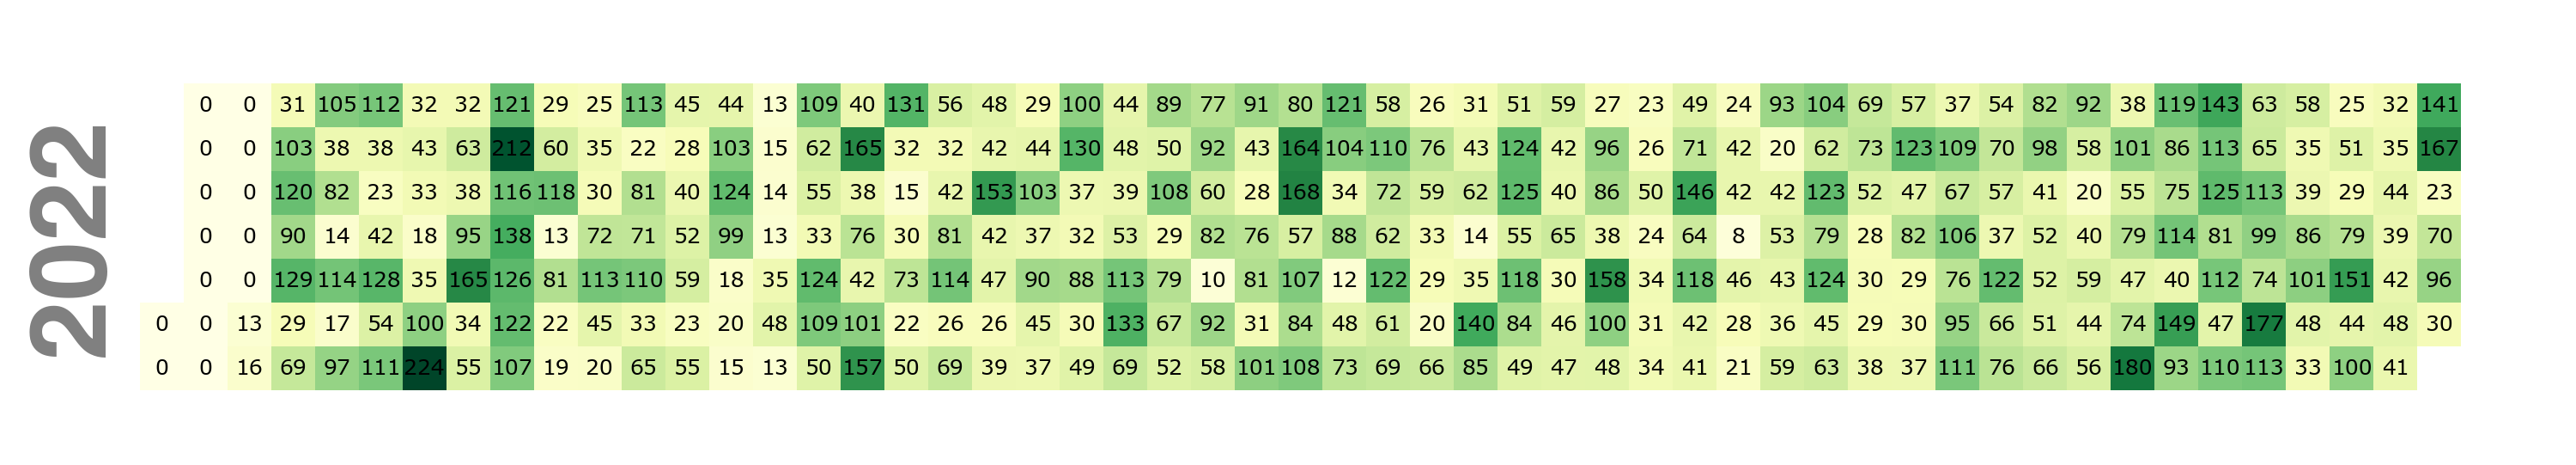

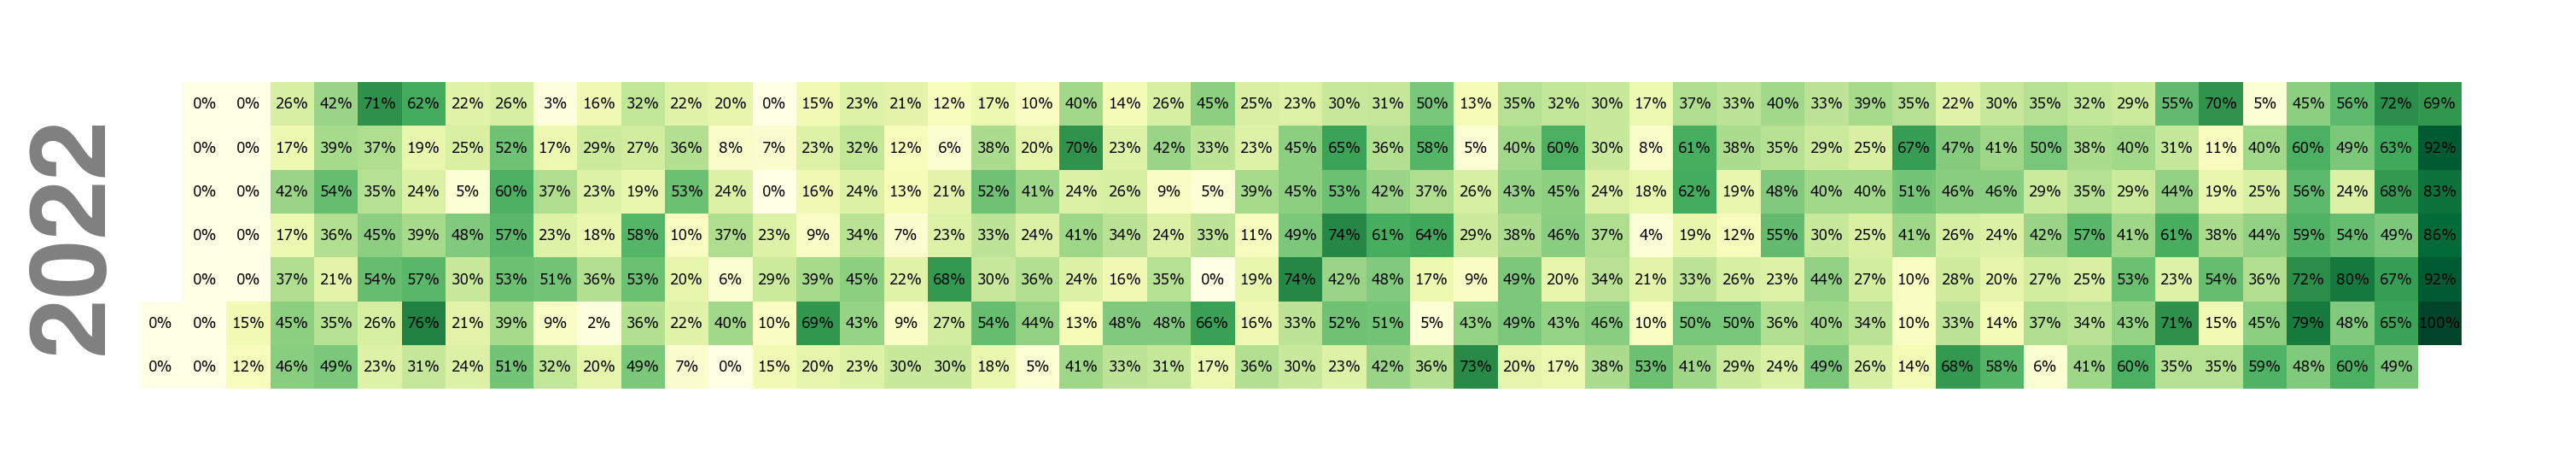

In [368]:
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
mpl.rcParams['font.size'] = 6
df = pd.Series([songs_per_day[date.date()] for date in calendar], index=calendar)
fig, _ = calplot.calplot(df, cmap="YlGn", colorbar=False, linewidth=0, textformat='{:n}', suptitle="number of songs listened to each day", suptitle_kws={'size': 15})
fig.dpi = 300
fig.axes[0].plot()

newsongsdf = pd.Series(newsongpercentage, index=calendar)
mpl.rcParams['font.size'] = 4
fig, _ = calplot.calplot(newsongsdf, cmap="YlGn", colorbar=False, linewidth=0, textformat='{:.0%}', suptitle="percentage of new songs", suptitle_kws={'size': 15})
fig.dpi = 300
fig.axes[0].plot()
fig.savefig("image.png", dpi=300)